# Linear Regression Model

### Importing local files (notebook edited on google colab)
Files need to be imported every time you open a browser section (if you want to execute something with the files). The files to be exported are:
1. Dataset: life_expectancy.csv
2. future_encoders.py

In [340]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
# Agrupando alguns os imports do código

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [342]:
# reading the csv with pandas
dataset = pd.read_csv("life_expectancy.csv")

#quick overview
print(dataset.shape)
dataset.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Information about the Dataset:

**Content**

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

Source: [kaggle.com](https://www.kaggle.com/kumarajarshi/life-expectancy-who)

1. Country: name
2. Year: ano em que a informação foi extraída
3. Status: país desenvolvido ou em desenvolvimento
4. Life Expectancy: em anos
5. Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) 
6. Infant deaths: Number of Infant Deaths per 1000 population
7. Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) 
8. Percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9. Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
10. Measles: number of reported cases per 1000 population
11. BMI: Average Body Mass Index of entire population
12. under-five deaths: Number of under-five deaths per 1000 population
13. Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
14. Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
15. Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
16. HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
17. GDP: Gross Domestic Product per capita (in USD)
18. Population: Population of the country
19. thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
20. thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
21. Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. Schooling: Number of years of Schooling(years)

In [343]:
# attributes of the dataset
dataset.columns

Index([u'Country', u'Year', u'Status', u'Life expectancy ', u'Adult Mortality',
       u'infant deaths', u'Alcohol', u'percentage expenditure', u'Hepatitis B',
       u'Measles ', u' BMI ', u'under-five deaths ', u'Polio',
       u'Total expenditure', u'Diphtheria ', u' HIV/AIDS', u'GDP',
       u'Population', u' thinness  1-19 years', u' thinness 5-9 years',
       u'Income composition of resources', u'Schooling'],
      dtype='object')

# 1. Preparing the Dataset:

## 1.1 Fixing the columns names

In [344]:
# all set to lowercase and spaces replaced by underscores
dataset = dataset.rename(columns={'Adult Mortality':'adult_mortality','infant deaths':'infant_deaths','percentage expenditure':'percentage_expenditure'})
dataset = dataset.rename(columns={'under-five deaths ':'under_five_deaths','Total expenditure':'total_expenditure',' thinness  1-19 years':'thinnes_1_19'})
dataset = dataset.rename(columns={' thinness 5-9 years':' thinnes_5_9','Income composition of resources':'income_composition_of_resources'})
dataset = dataset.rename(columns={'Hepatitis B':'hepatitis_b','Life expectancy ':'life_expectancy'})
dataset = dataset.rename(columns=lambda x: str.strip(x))
dataset = dataset.rename(str.lower,axis='columns')
dataset.columns

Index([u'country', u'year', u'status', u'life_expectancy', u'adult_mortality',
       u'infant_deaths', u'alcohol', u'percentage_expenditure', u'hepatitis_b',
       u'measles', u'bmi', u'under_five_deaths', u'polio',
       u'total_expenditure', u'diphtheria', u'hiv/aids', u'gdp', u'population',
       u'thinnes_1_19', u'thinnes_5_9', u'income_composition_of_resources',
       u'schooling'],
      dtype='object')

## 1.2 Taking a look at the Dataset (Overview)

In [345]:
# some infos about the dataframe. Useful to check on missing values and data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                            2938 non-null object
year                               2938 non-null int64
status                             2938 non-null object
life_expectancy                    2928 non-null float64
adult_mortality                    2928 non-null float64
infant_deaths                      2938 non-null int64
alcohol                            2744 non-null float64
percentage_expenditure             2938 non-null float64
hepatitis_b                        2385 non-null float64
measles                            2938 non-null int64
bmi                                2904 non-null float64
under_five_deaths                  2938 non-null int64
polio                              2919 non-null float64
total_expenditure                  2712 non-null float64
diphtheria                         2919 non-null float64
hiv/aids                           2938 non-null

In [346]:
# calculates useful metrics for all the attributes!
dataset.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinnes_1_19,thinnes_5_9,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


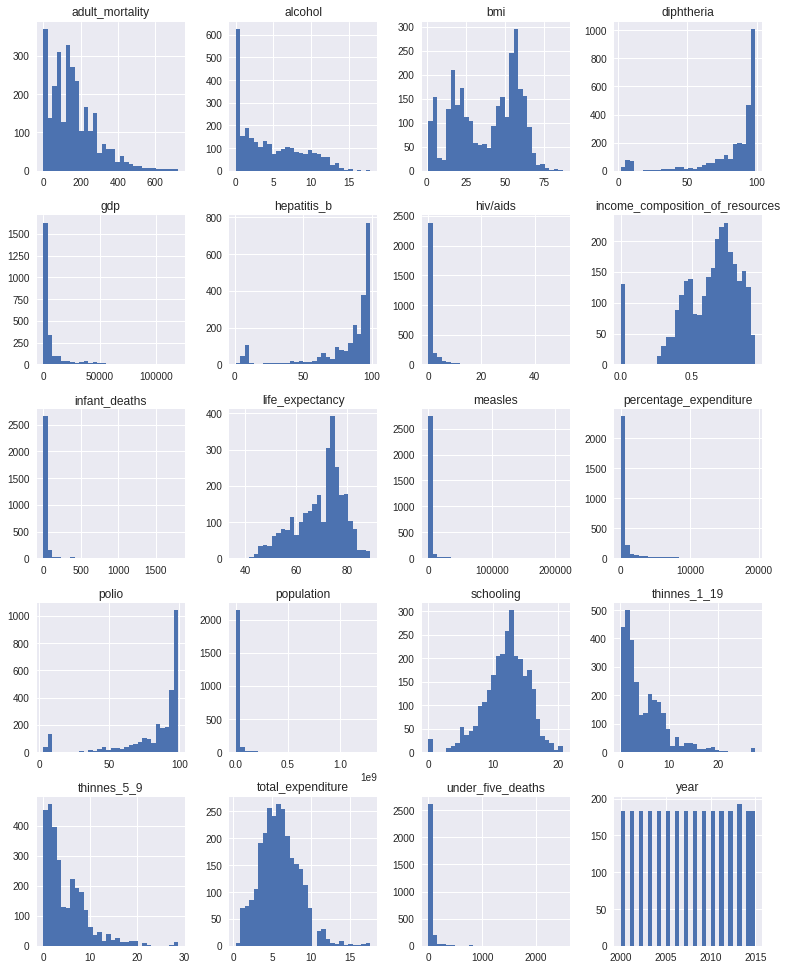

In [347]:
# what the attributes' distributions look like?
dataset.hist(bins=30,figsize=(13,17))
plt.show()

## 1.3 Splitting the data in dataTrain and dataTest

In [348]:
dataTrain, dataTest = train_test_split(dataset, 
                                       test_size=0.2, 
                                       random_state=35)

# these attributes won't be used for anything. Removing them to avoid troubles.
dataTrain = dataTrain.drop(["year","country"], axis=1)
dataTest = dataTest.drop(["year","country"], axis=1)

print("data has {} instances\n {} train instances\n {} test intances".
      format(len(dataset),len(dataTrain),len(dataTest)))

# always good to be checking the shape, making sure everything is allright
print(dataTrain.shape)
print('\n')

dataTrain.isnull().sum()

data has 2938 instances
 2350 train instances
 588 test intances
(2350, 20)




status                               0
life_expectancy                      6
adult_mortality                      6
infant_deaths                        0
alcohol                            167
percentage_expenditure               0
hepatitis_b                        425
measles                              0
bmi                                 28
under_five_deaths                    0
polio                               16
total_expenditure                  192
diphtheria                          16
hiv/aids                             0
gdp                                364
population                         521
thinnes_1_19                        28
thinnes_5_9                         28
income_composition_of_resources    129
schooling                          128
dtype: int64

**Missing values on the output caused some problems in the end. As there are only 6 missing values, it's better to simply remove those samples.**

In [349]:
dataTrain = dataTrain.dropna(subset=['life_expectancy'])
dataTest = dataTest.dropna(subset=['life_expectancy'])
print(dataTrain.shape)
dataTrain.isnull().sum()

(2344, 20)


status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                            166
percentage_expenditure               0
hepatitis_b                        425
measles                              0
bmi                                 27
under_five_deaths                    0
polio                               16
total_expenditure                  192
diphtheria                          16
hiv/aids                             0
gdp                                361
population                         516
thinnes_1_19                        27
thinnes_5_9                         27
income_composition_of_resources    126
schooling                          126
dtype: int64

## 1.4 Investigating the Dataset, looking for insights
Variables created:
1. train - copy of dataTrain

In [0]:
#create a copy of the dataset so we can alter it freely

train = dataTrain.copy()

On this step, we're just exploring the dataset manually, trying to understand it in different ways. For example, we'll try to plot some variables in pairs, to see if some of them are related in some way.

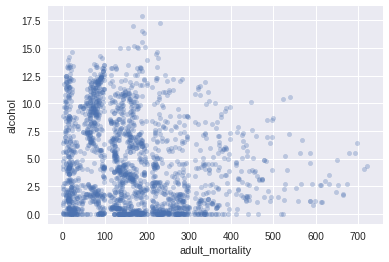

In [351]:
train.plot(kind="scatter", x="adult_mortality", y="alcohol", alpha=0.3)
plt.show()

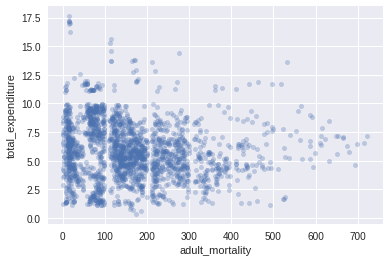

In [352]:
train.plot(kind="scatter", x="adult_mortality", y="total_expenditure", alpha=0.3)
plt.show()

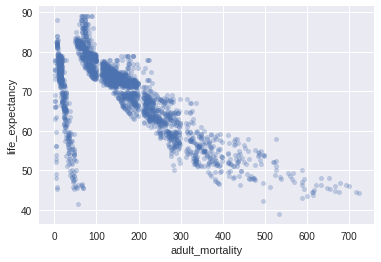

In [353]:
train.plot(kind="scatter", x="adult_mortality", y="life_expectancy", alpha=0.3)
plt.show()

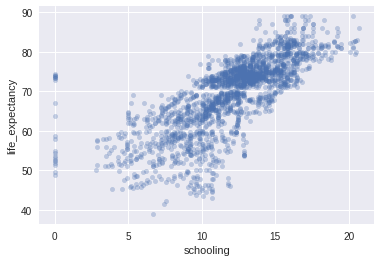

In [354]:
train.plot(kind="scatter", x="schooling", y="life_expectancy", alpha=0.3)
plt.show()

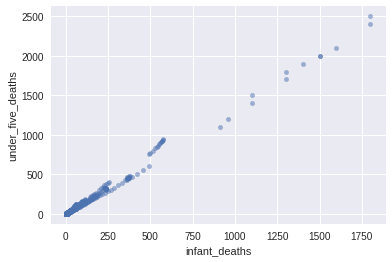

In [355]:
train.plot(kind="scatter", x="infant_deaths", y="under_five_deaths", alpha=0.5)
plt.show()

Expected result. Infant deaths should be very much related to death of children under five years old. It's a good indicator that at least the dataset is reliable.

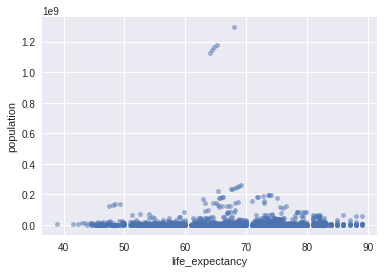

In [356]:
train.plot(kind="scatter", x="life_expectancy", y="population", alpha=0.5)
plt.show()

This last result is very insteresting. Population has no relation with the Life Expectancy of a country (apparently).

### 1.4.1 Plots with 4 dimensions

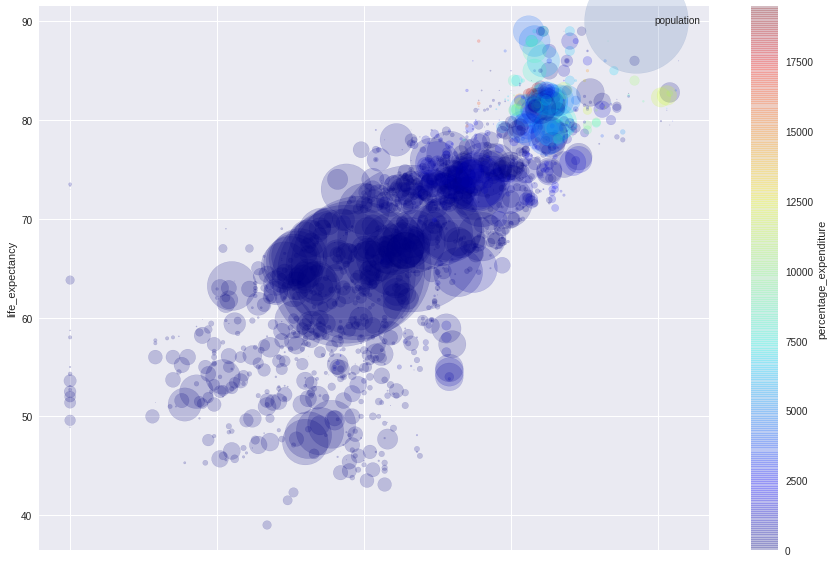

In [357]:
train.plot(kind="scatter", x="schooling", y="life_expectancy", alpha=0.2,
           s=train["population"]/60000, label="population",
           c="percentage_expenditure", cmap=plt.get_cmap("jet"), colorbar=True,figsize=(15,10)) 
plt.legend()
plt.show()

The graph above is very interesting. It shows that, apparently, the population of a country does not influence its life expectancy very much.

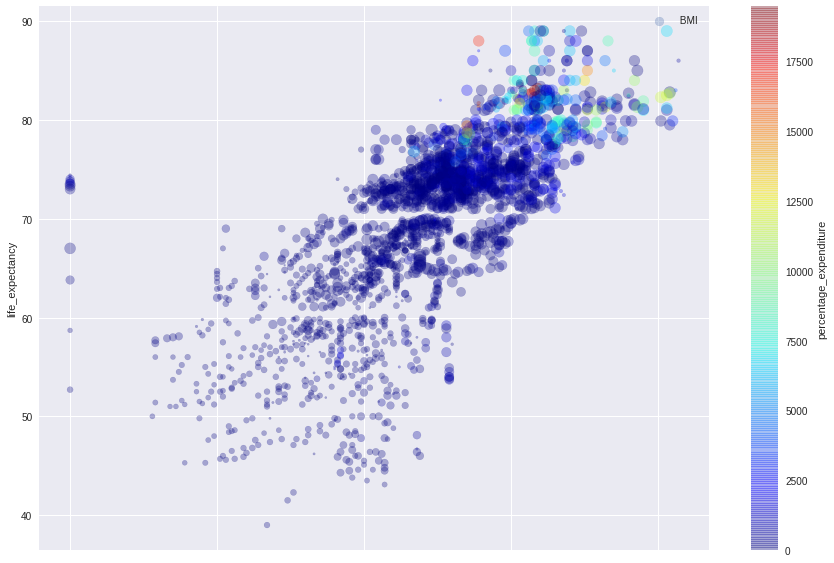

In [358]:
train.plot(kind="scatter", x="schooling", y="life_expectancy", alpha=0.3,
           s=train["bmi"]*2, label=" BMI ",
           c="percentage_expenditure", cmap=plt.get_cmap("jet"), colorbar=True,figsize=(15, 10)) 
plt.legend()
plt.show()

Another interesting plot. On this one, it's clear that there is a strong relation between the life expectancy and the schooling. Additionally, it also has a good relation with the BMI.

### 1.4.2 Calculating the correlation between the attributes

The calculations below allow us to confirm what the previous plots seem to show.

In [359]:
corr_matrix = train.corr()
corr_matrix["life_expectancy"].\
  sort_values(ascending=False)

life_expectancy                    1.000000
schooling                          0.752870
income_composition_of_resources    0.729715
bmi                                0.558529
diphtheria                         0.473693
polio                              0.459108
gdp                                0.458097
alcohol                            0.408061
percentage_expenditure             0.378494
hepatitis_b                        0.243715
total_expenditure                  0.224432
population                        -0.019619
measles                           -0.151350
infant_deaths                     -0.200722
under_five_deaths                 -0.227379
thinnes_5_9                       -0.477016
thinnes_1_19                      -0.479978
hiv/aids                          -0.556929
adult_mortality                   -0.698764
Name: life_expectancy, dtype: float64

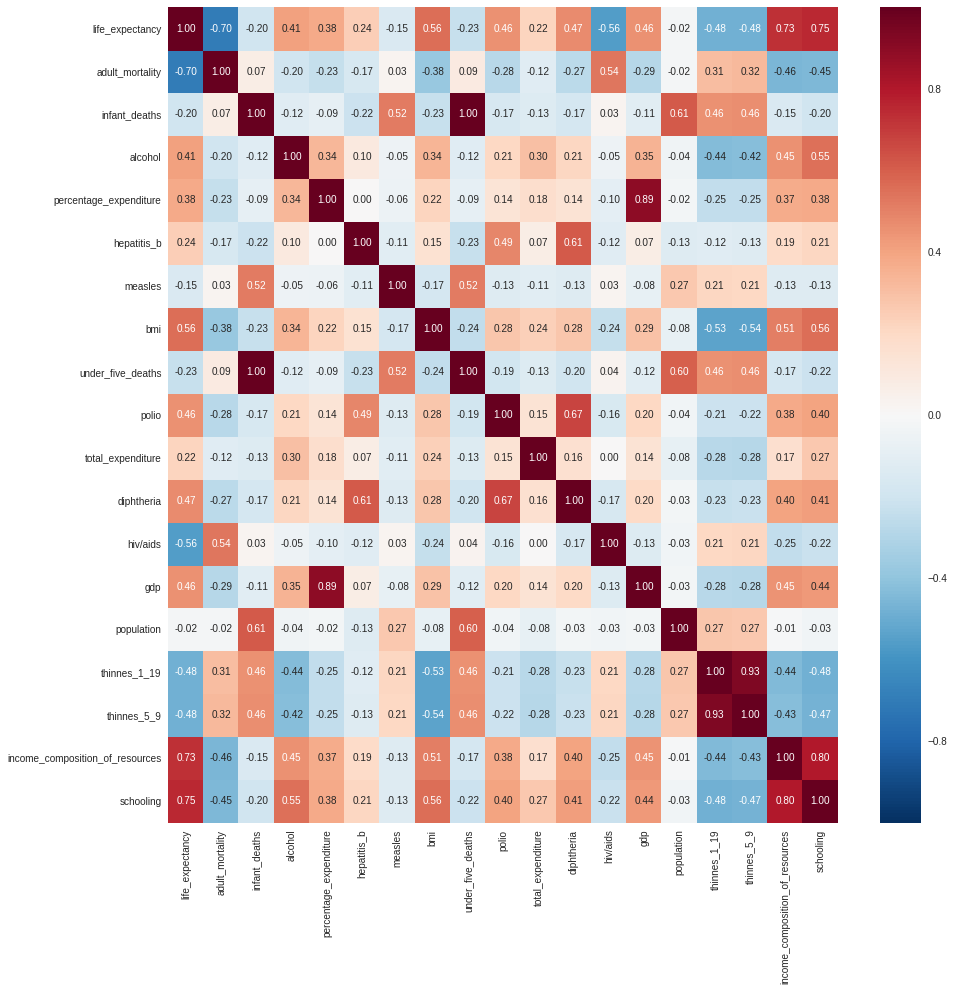

In [360]:
fig = figure(3, figsize=(15, 15))
sns.heatmap(train.corr(), 
            annot=True, fmt=".2f")
plt.show()

## 1.5 Treating the NULL values
Variables created:
1. **train_X** = copy of dataTrain without life_expectancy
2. **train_y** = life_expectancy columns (labels)

In [0]:
# drop creates a copy of the remain data and does not affect dataTrain
train_X = dataTrain.drop("life_expectancy", axis=1)

# copy the label (y) from train_set
train_y = dataTrain['life_expectancy'].copy()

In [362]:
# Checando quantos elementos nulos
print(train_X.shape)
train_X.isnull().sum()

(2344, 19)


status                               0
adult_mortality                      0
infant_deaths                        0
alcohol                            166
percentage_expenditure               0
hepatitis_b                        425
measles                              0
bmi                                 27
under_five_deaths                    0
polio                               16
total_expenditure                  192
diphtheria                          16
hiv/aids                             0
gdp                                361
population                         516
thinnes_1_19                        27
thinnes_5_9                         27
income_composition_of_resources    126
schooling                          126
dtype: int64

**Regarding the missing values**, we'll  do as following:
1. population: since the correlation to the output is almost null, we'll drop this attribute.

For the rest, we'll replace the missing values for the median.


In [363]:
# Dropping population
train_X = train_X.drop('population', axis=1)
print(train_X.shape)
train_X.isnull().sum()

(2344, 18)


status                               0
adult_mortality                      0
infant_deaths                        0
alcohol                            166
percentage_expenditure               0
hepatitis_b                        425
measles                              0
bmi                                 27
under_five_deaths                    0
polio                               16
total_expenditure                  192
diphtheria                          16
hiv/aids                             0
gdp                                361
thinnes_1_19                        27
thinnes_5_9                         27
income_composition_of_resources    126
schooling                          126
dtype: int64

### 1.5.1 Replacing the missing values
Variables created:
1. train_X_num = copy of train_X without non-numerical values


In [364]:
#drop the text values
train_X_num = train_X.drop(["status"], axis=1)

# choose the median approach
imputer = Imputer(strategy="median")
# Now you can fit the imputer instance to the training data using 
# the fit() method:
imputer.fit(train_X_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [365]:
imputer.statistics_

array([1.43000000e+02, 3.00000000e+00, 3.80000000e+00, 6.40216010e+01,
       9.20000000e+01, 1.60000000e+01, 4.38000000e+01, 4.00000000e+00,
       9.30000000e+01, 5.71000000e+00, 9.30000000e+01, 1.00000000e-01,
       1.75717797e+03, 3.30000000e+00, 3.30000000e+00, 6.78000000e-01,
       1.24000000e+01])

In [366]:
train_X_num.median().values

array([1.43000000e+02, 3.00000000e+00, 3.80000000e+00, 6.40216010e+01,
       9.20000000e+01, 1.60000000e+01, 4.38000000e+01, 4.00000000e+00,
       9.30000000e+01, 5.71000000e+00, 9.30000000e+01, 1.00000000e-01,
       1.75717797e+03, 3.30000000e+00, 3.30000000e+00, 6.78000000e-01,
       1.24000000e+01])

In [0]:
# Now you can use this “trained” imputer to transform the training set by 
# replacing missing values by the learned medians:
train_X_num_array = imputer.transform(train_X_num)

# The result is a plain Numpy array containing the transformed features. 
# If you want to put it back into a Pandas DataFrame, it’s simple:
train_X_num_df = pd.DataFrame(train_X_num_array, columns=train_X_num.columns)

In [368]:
# check if it worked
print(train_X_num_df.shape)
train_X_num_df.isnull().sum()

(2344, 17)


adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
thinnes_1_19                       0
thinnes_5_9                        0
income_composition_of_resources    0
schooling                          0
dtype: int64

### 1.5.2 Mapping the text values in "Status" to numeric categories.
Easy, as there are only two status!

New variables: 
1. **train_X_cat_encoded**: new column replacing the text by the categories (0 or 1)
2. **train_X_categories**: name of the categories

In [369]:
# For this, we can use Pandas' factorize() method which maps each 
# category to a different integer:
train_X_cat_encoded, train_X_categories = train_X.status.factorize()

# train_X_cat_encoded is now purely numerical
train_X_cat_encoded[0:20]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [370]:
# factorize() method also return the list of categories
train_X_categories

Index([u'Developing', u'Developed'], dtype='object')

**Appending the new categorized column back in train_X_num_df**

In [371]:
#Adicionando a coluna de volta no dataframe
train_X_num_df['status'] = train_X_cat_encoded
train_X_num_df.shape

(2344, 18)

In [372]:
train_X_num_df.head()

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinnes_1_19,thinnes_5_9,income_composition_of_resources,schooling,status
0,12.0,3.0,1.28,64.856167,98.0,1.0,56.5,3.0,98.0,6.54,98.0,0.1,414.151770,6.3,6.3,0.710,14.4,0
1,136.0,29.0,2.70,0.000000,94.0,410.0,11.3,36.0,94.0,5.38,95.0,0.2,1757.177970,15.3,16.0,0.609,11.1,0
2,71.0,0.0,6.70,1678.392773,89.0,4.0,63.9,0.0,94.0,8.60,94.0,0.1,13689.989990,0.7,0.7,0.790,13.8,1
3,219.0,55.0,4.61,24.589734,89.0,2920.0,24.3,69.0,84.0,4.56,89.0,0.1,276.289146,1.0,9.7,0.671,11.7,0
4,121.0,1.0,3.80,0.000000,94.0,383.0,6.0,1.0,95.0,5.71,95.0,0.1,5237.255334,2.0,2.0,0.775,14.4,0


## 1.6 Feature Scaling

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('imputer', Imputer(strategy="median")),
                         ('std_scaler', StandardScaler())
                        ])

train_X_num_pipeline = num_pipeline.fit_transform(train_X_num)

In [374]:
train_X_num_pipeline

array([[-1.22380716, -0.23901211, -0.84497174, ...,  0.32430312,
         0.37762852,  0.7232719 ],
       [-0.22017617, -0.01445834, -0.48316182, ...,  2.48253969,
        -0.11382767, -0.28757853],
       [-0.74627306, -0.26492216,  0.53602106, ..., -0.92168912,
         0.76690074,  0.53948091],
       ...,
       [ 1.05864395, -0.24764879,  1.08383185, ...,  0.34655298,
         0.13433338,  0.14126711],
       [-0.73817926, -0.24764879,  1.18575014, ..., -0.96618885,
         0.99073227,  0.96832655],
       [-0.39014594, -0.26492216,  0.50034966, ..., -0.63244092,
         0.75230303,  0.90706289]])

In [375]:
train_X_num.shape

(2344, 17)

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# This class will transform the data by selecting the desired attributes,
# dropping the rest, and converting the resulting DataFrame to a NumPy array.
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X[self.attribute_names].values

In [0]:
# Used to join two or more pipelines into a single pipeline
from sklearn.pipeline import FeatureUnion

# https://github.com/scikit-learn/scikit-learn/issues/10521
from future_encoders import OneHotEncoder

# numerical columns 
num_attribs = list(train_X_num.columns)

# categorical columns
cat_attribs = ["status"]

# pipeline for numerical columns
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('imputer', Imputer(strategy="median")),
                         ('std_scaler', StandardScaler())
                        ])

# pipeline for categorical column
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                         ('cat_encoder', OneHotEncoder(sparse=False))
                        ])

# a full pipeline handling both numerical and categorical attributes
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline)
                                              ])

In [378]:
# you can run the whole pipeline simply
train_X_prepared = full_pipeline.fit_transform(train_X)
train_X_prepared

array([[-1.22380716, -0.23901211, -0.84497174, ...,  0.7232719 ,
         0.        ,  1.        ],
       [-0.22017617, -0.01445834, -0.48316182, ..., -0.28757853,
         0.        ,  1.        ],
       [-0.74627306, -0.26492216,  0.53602106, ...,  0.53948091,
         1.        ,  0.        ],
       ...,
       [ 1.05864395, -0.24764879,  1.08383185, ...,  0.14126711,
         0.        ,  1.        ],
       [-0.73817926, -0.24764879,  1.18575014, ...,  0.96832655,
         1.        ,  0.        ],
       [-0.39014594, -0.26492216,  0.50034966, ...,  0.90706289,
         0.        ,  1.        ]])

# 2. Trainning the models

## 2.1 Linear Regressor

In [379]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression model
lin_reg = LinearRegression()

# fit it
lin_reg.fit(train_X_prepared, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [380]:
# Done!! You now have a working Linear Regression Model.
# Let's try it out on a few instances from the trainning set.

# prepare the data
some_data = train_X.iloc[:5]
some_labels = train_y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# make predictions
print("Predictions:", lin_reg.predict(some_data_prepared))

('Predictions:', array([76.08833586, 68.46283578, 78.04425425, 68.38607895, 72.58959209]))


In [381]:
# Compare against the actual values:
print("Labels:", list(some_labels))

('Labels:', [74.8, 74.4, 78.5, 68.1, 75.6])


In [382]:
from sklearn.metrics import mean_squared_error

life_exp_predictions = lin_reg.predict(train_X_prepared)
lin_mse = mean_squared_error(train_y, life_exp_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.991961743568653

## 2.2 DecisionTreeRegressor

In [383]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X_prepared, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [384]:
# now that the model is trained, let's evaluate it on the training set

life_exp_predictions = tree_reg.predict(some_data_prepared)
tree_mse = mean_squared_error(some_labels, life_exp_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## 2.3 RandomForestRegressor

In [385]:
from sklearn.ensemble import RandomForestRegressor

# create a RandomForestRegressor model
forest_reg = RandomForestRegressor()

# fit it
forest_reg.fit(train_X_prepared, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [386]:
# predict the prepared data
housing_predictions = forest_reg.predict(train_X_prepared)

forest_mse = mean_squared_error(train_y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.8782665258585723

# 3. Checking the models with cross-validation

In [0]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

## 3.1 Linear Regressor

In [388]:
from sklearn.model_selection import cross_val_score

lin_reg = DecisionTreeRegressor()

scores_lin = cross_val_score(lin_reg, 
                         train_X_prepared, 
                         train_y,
                         scoring="neg_mean_squared_error",
                         cv=10)
rmse_scores_lin = np.sqrt(-scores_lin)
display_scores(rmse_scores_lin)

# Scikit-Learn cross-validation features expect a utility function (greater is better)
# rather than a cost function (lower is better), so the scoring function is 
# actually the opposite of the MSE (i.e., a negative value), which is why the 
# preceding code computes scores before calculating the square root.

('Scores:', array([2.70808875, 3.00513745, 2.61114632, 2.78576931, 2.44473095,
       2.61451406, 2.59767319, 2.87838244, 3.07855139, 2.99803354]))
('Mean:', 2.772202738418989)
('Standard deviation:', 0.20079333565948795)


## 3.2 Decision Tree

In [389]:
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor()

scores_tree = cross_val_score(tree_reg, 
                         train_X_prepared, 
                         train_y,
                         scoring="neg_mean_squared_error",
                         cv=10)
rmse_scores_tree = np.sqrt(-scores_tree)
display_scores(rmse_scores_tree)

# Scikit-Learn cross-validation features expect a utility function (greater is better)
# rather than a cost function (lower is better), so the scoring function is 
# actually the opposite of the MSE (i.e., a negative value), which is why the 
# preceding code computes scores before calculating the square root.

('Scores:', array([2.69759546, 3.11271927, 2.69246387, 2.97774726, 2.37548915,
       2.6609233 , 2.46991297, 3.12113008, 3.06928539, 2.77825808]))
('Mean:', 2.795552484409156)
('Standard deviation:', 0.25216292996329354)


## 3.3 Random Forest

In [390]:
from sklearn.model_selection import cross_val_score

forest_reg = DecisionTreeRegressor()

scores_forest = cross_val_score(forest_reg, 
                         train_X_prepared, 
                         train_y,
                         scoring="neg_mean_squared_error",
                         cv=10)
rmse_scores_forest = np.sqrt(-scores_forest)
display_scores(rmse_scores_forest)

# Scikit-Learn cross-validation features expect a utility function (greater is better)
# rather than a cost function (lower is better), so the scoring function is 
# actually the opposite of the MSE (i.e., a negative value), which is why the 
# preceding code computes scores before calculating the square root.

('Scores:', array([2.83628465, 3.22275817, 2.61053512, 2.82817135, 2.28907662,
       2.61636859, 2.51821569, 2.88238831, 2.9119559 , 2.76658943]))
('Mean:', 2.7482343852001287)
('Standard deviation:', 0.24177233773624868)


# 4. Fine-tunning the Random Forest

In [0]:
from sklearn.model_selection import GridSearchCV

# hyperparameters values
# param_grid[0] - 12 combinations
# param_grid[1] - 6 combinations
param_grid = [{'n_estimators': [3, 10, 30], 
               'max_features': [2, 4, 6, 8]
              },
              {'bootstrap': [False], 
               'n_estimators': [3, 10],
               'max_features': [2, 3, 4]
              }
             ]

# create a randomforeestregressor model
forest_reg = RandomForestRegressor()

# run the grid search with cross validation
# (12 + 6) x 5 = 90 combinations
grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=5,
                           scoring='neg_mean_squared_error')

# see 90 combinations!!!
# it may take quite a long time
grid_search.fit(train_X_prepared, train_y)

In [263]:
# when gridsearch is done you can get the best combination of parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [264]:
# you can also get the best estimator too
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [266]:
# a fancy visualization of results
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

(2.84427811473008, {'max_features': 2, 'n_estimators': 3})
(2.459048320660802, {'max_features': 2, 'n_estimators': 10})
(2.2219624888503793, {'max_features': 2, 'n_estimators': 30})
(2.576054003372158, {'max_features': 4, 'n_estimators': 3})
(2.137020678549011, {'max_features': 4, 'n_estimators': 10})
(2.0708841695849856, {'max_features': 4, 'n_estimators': 30})
(2.5066191289697572, {'max_features': 6, 'n_estimators': 3})
(2.137810333139452, {'max_features': 6, 'n_estimators': 10})
(2.0140276972810596, {'max_features': 6, 'n_estimators': 30})
(2.4618993726484124, {'max_features': 8, 'n_estimators': 3})
(2.067192546812529, {'max_features': 8, 'n_estimators': 10})
(1.968403657739643, {'max_features': 8, 'n_estimators': 30})
(2.7444500482794267, {'max_features': 2, 'n_estimators': 3, 'bootstrap': False})
(2.2369582137167145, {'max_features': 2, 'n_estimators': 10, 'bootstrap': False})
(2.4902528986894428, {'max_features': 3, 'n_estimators': 3, 'bootstrap': False})
(2.0888281166778397, {'m

# 5. Analising the best models

In [267]:
# can indicate the relative importance of each attribute 
# for making accurate predictions
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.22105114, 0.0120374 , 0.00961195, 0.00509403, 0.00452327,
       0.00414219, 0.01075895, 0.02427502, 0.0174534 , 0.00788245,
       0.00699979, 0.3308069 , 0.00569673, 0.02032614, 0.01989071,
       0.23939161, 0.05725803, 0.00052871, 0.00227156])

In [0]:
# let's display these importance scores next to their corresponding attribute names

# categorical component of pipeline
cat_encoder = cat_pipeline.named_steps["cat_encoder"]

# get the names
cat_one_hot_attribs = list(cat_encoder.categories_[0])

# all columns names
attributes = num_attribs + cat_one_hot_attribs

In [272]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3308069049128878, 'hiv/aids'),
 (0.23939160720046274, 'income_composition_of_resources'),
 (0.22105113904654025, 'adult_mortality'),
 (0.057258034980207574, 'schooling'),
 (0.02427501548234059, 'under_five_deaths'),
 (0.02032614192201028, 'thinnes_1_19'),
 (0.01989071271751454, 'thinnes_5_9'),
 (0.017453403630165877, 'polio'),
 (0.012037403354242823, 'infant_deaths'),
 (0.010758950464961418, 'bmi'),
 (0.009611950516064725, 'alcohol'),
 (0.007882446383719767, 'total_expenditure'),
 (0.006999793712780511, 'diphtheria'),
 (0.005696728431778206, 'gdp'),
 (0.005094030961913197, 'percentage_expenditure'),
 (0.0045232721469596025, 'hepatitis_b'),
 (0.004142193466613083, 'measles'),
 (0.002271557275561245, 'Developing'),
 (0.0005287133932758578, 'Developed')]

# 6. Testing the Linear Regression Model

In [280]:
# create a LinearRegression model
lin_reg_test = LinearRegression()

# fit it
lin_reg_test.fit(train_X_prepared, train_y)

# predictors and label
test_X = dataTest.drop("life_expectancy", axis=1)
test_y = dataTest["life_expectancy"].copy()

# prepared test's predictors
test_X_prepared = full_pipeline.transform(test_X)


final_predictions = lin_reg_test.predict(test_X_prepared)
final_mse = mean_squared_error(test_y, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

4.237521872049985


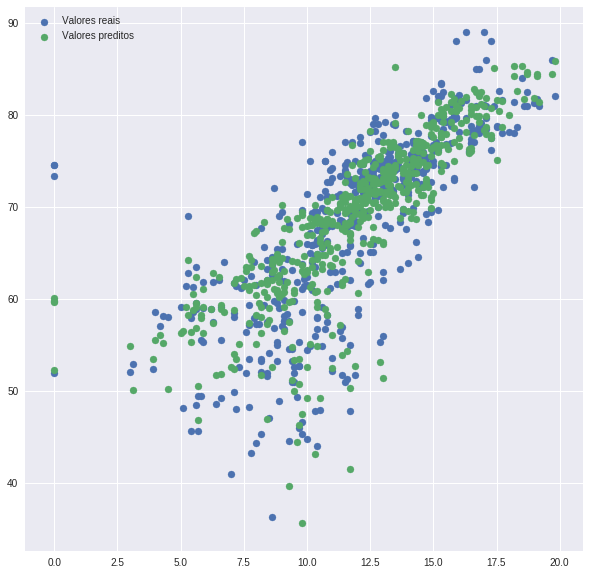

In [287]:
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(10,10))
plt.scatter(test_X["schooling"].values, test_y, label="Valores reais")
plt.scatter(test_X["schooling"].values, final_predictions, label="Valores preditos")
plt.legend()
plt.show()